<a href="https://colab.research.google.com/github/Whoami666/HSE_Lab/blob/main/schizophrenia_est_models_standard_Logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_excel('/content/df_standard_cleaned_21feb.xlsx')   
df = df.set_index('ID')
df.head(1)

,sex,tds,chroma_cens_avg,chroma_cens_std,chroma_cqt_avg,chroma_cqt_std,chroma_stft_avg,chroma_stft_std,melspectrogram_avg,melspectrogram_std,...,spectral_flatness_std,spectral_rolloff_avg,spectral_rolloff_std,tempogram_avg,tempogram_std,tonnetz_avg,tonnetz_std,zero_crossing_rate_avg,zero_crossing_rate_std,tds_binary
ID,,,,,,,,,,,,,,,,,,,,,
PD-003,1,0,0.685706,0.428088,0.425039,0.296394,0.339246,0.434412,0.327867,0.348849,...,0.31499,0.397736,0.254215,0.747885,0.719312,0.691479,0.329593,0.197304,0.281692,0


**Models**

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

**Logreg**

Non-binary

In [38]:
X = df.drop(['tds', 'tds_binary'], axis=1)
y = df.tds # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=16)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)  
          
clf.fit(X_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9027272727272727


In [40]:
warnings.filterwarnings('default')

In [41]:
params = clf.best_params_
logreg = LogisticRegression(solver=params['solver'], max_iter=6000, penalty=params['penalty'], C=params['C']) #, class_weight = 'balanced' 'C': 0.1,  'penalty': 'l2',  'solver': 'liblinear'
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred))
val_acc = accuracy_score(y_pred, y_test)
print(val_acc)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        60
           1       0.33      0.17      0.22         6
           2       0.00      0.00      0.00         2

    accuracy                           0.88        68
   macro avg       0.41      0.38      0.39        68
weighted avg       0.83      0.88      0.85        68

0.8823529411764706


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Binary

In [43]:
X = df.drop(['tds', 'tds_binary'], axis=1)
y = df.tds_binary # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=16)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)  
          
clf.fit(X_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8927272727272728


In [45]:
warnings.filterwarnings('default')

In [46]:
params = clf.best_params_
logreg = LogisticRegression(solver=params['solver'], max_iter=6000, penalty=params['penalty'], C=params['C']) #, class_weight = 'balanced' 'C': 0.1,  'penalty': 'l2',  'solver': 'liblinear'
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [47]:
scoring = ['recall', 'accuracy', 'f1', 'roc_auc']
scores = cross_validate(logreg, X, y, scoring=scoring)
scores

{'fit_time': array([0.01052213, 0.00930142, 0.00586724, 0.00731182, 0.0047245 ]),
 'score_time': array([0.00714445, 0.00905466, 0.006145  , 0.00656295, 0.00626993]),
 'test_recall': array([0.        , 0.        , 1.        , 0.5       , 0.33333333]),
 'test_accuracy': array([0.85294118, 0.82352941, 0.94117647, 0.94117647, 0.90909091]),
 'test_f1': array([0.        , 0.        , 0.8       , 0.66666667, 0.4       ]),
 'test_roc_auc': array([0.875     , 0.85833333, 0.96666667, 0.94166667, 0.87777778])}

**Get rid of 2 few non-1D features**

In [ ]:
df = df.drop(['melspectrogram_std', 'melspectrogram_avg', 'mfcc_std'], axis=1)
df.head(1)

Non-binary

In [49]:
X = df.drop(['tds', 'tds_binary'], axis=1)
y = df.tds # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=16)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)  
          
clf.fit(X_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters : {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.9127272727272727


In [51]:
params = clf.best_params_
logreg = LogisticRegression(solver=params['solver'], max_iter=6000, penalty=params['penalty'], C=params['C']) #, class_weight = 'balanced' 'C': 0.1,  'penalty': 'l2',  'solver': 'liblinear'
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred))
val_acc = accuracy_score(y_pred, y_test)
print(val_acc)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        60
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2

    accuracy                           0.85        68
   macro avg       0.30      0.32      0.31        68
weighted avg       0.79      0.85      0.82        68

0.8529411764705882


Binary

In [54]:
X = df.drop(['tds', 'tds_binary'], axis=1)
y = df.tds_binary # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=16)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)  
          
clf.fit(X_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters : {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9127272727272727


In [56]:
params = clf.best_params_
logreg = LogisticRegression(solver=params['solver'], max_iter=6000, penalty=params['penalty'], C=params['C']) #, class_weight = 'balanced' 'C': 0.1,  'penalty': 'l2',  'solver': 'liblinear'
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [57]:
scoring = ['recall', 'accuracy', 'f1', 'roc_auc']
scores = cross_validate(logreg, X, y, scoring=scoring)
scores

{'fit_time': array([0.02877951, 0.0190804 , 0.01985312, 0.01957703, 0.02236795]),
 'score_time': array([0.01017809, 0.0070827 , 0.00721884, 0.00730252, 0.00729942]),
 'test_recall': array([0.25, 0.  , 1.  , 0.25, 0.  ]),
 'test_accuracy': array([0.88235294, 0.82352941, 0.94117647, 0.91176471, 0.87878788]),
 'test_f1': array([0.33333333, 0.        , 0.8       , 0.4       , 0.        ]),
 'test_roc_auc': array([0.65      , 0.81666667, 0.96666667, 0.91666667, 0.92222222])}

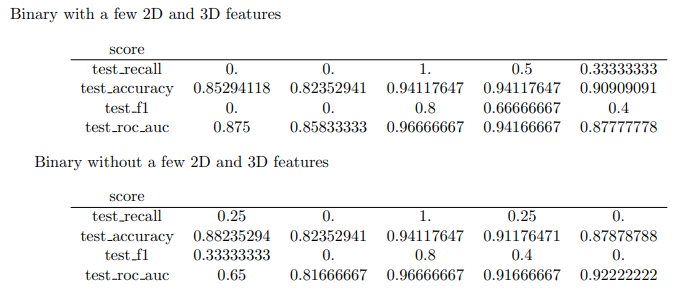